In [1]:
#! python3

"""CEGE 8215 EXAM 3"""

__author__ = 'Simanta Barman'
__email__ = 'barman017@umn.edu'

In [2]:
from math import log, pi
import numpy as np                               # For Linear algebra
import symengine as se                           # Just for the state space representation
from matplotlib import pyplot as plt             # For Plotting
from scipy.optimize import minimize              # Optimization

# For printing data
from pprint import pprint, pformat
from IPython.display import display, Markdown
from tabulate import tabulate

plt.rcParams["figure.figsize"] = (16, 9)
plt.rcParams["figure.dpi"] = 300

In [3]:
def bmatrix(mat):
    """Returns a LaTeX bmatrix"""
    if len(mat.shape) > 2:
        raise Exception
    rows = str(mat).replace('[', '').replace(']', '').splitlines()
    return ''.join([r'\begin{bmatrix}'] + ['  ' + ' & '.join(row.split()) + r'\\' for row in rows] + [r'\end{bmatrix}'])

# data = []
# with open('finalexam_s21.txt') as file:
#     for line in file.readlines():
#         data.append(float(line.strip()))
        
# data = np.array(data)

In [4]:
data = np.array([  1.1447281 ,  -1.26591173,  -2.17185806,   2.18351678,
         0.59915128,  -4.95849928,   5.24863186,   2.90722411,
         3.87459605,   1.95189558,   1.02684869,  -2.97415511,
        -0.76056349,   3.41996515,   2.92685922,   0.19061215,
        -2.23263168,  -0.93091791,   0.85171965,   4.18453718,
         8.44178868,  -3.13338523,   1.32872985,   1.34122391,
         8.04189515,   3.99168704, -15.04949068,   5.32110955,
        -2.39307173,  -1.78355973,   1.38921275,  -3.24933   ,
         2.88217058,  -4.43732938,  10.78789498, -15.96466423,
         7.50585922,  10.8520885 ,   2.1385455 ,   2.93661219,
        -7.79709659,  -7.59836393,   4.79615189,   7.66668867,
         3.73325471,  -6.40306192,   2.65809188,   1.76036679,
        -5.04344964,  -2.34474865,  -1.50999531,  -0.39725457,
        -1.27031711,   2.37233254,  -1.79616551,  -0.77745002,
         7.09269934,  -0.70587129,   9.47062096, -11.32606041,
         1.33276997,   2.35900378,   7.60892313,   0.44673244,
       -10.57646899,  -5.08359931,  14.75091753,   1.18022658,
        -2.1068449 ,  -5.06369942,  -4.15161488,  -6.25378097,
        -2.06262954,   8.44295297,   4.19869228,   2.1688431 ,
        -7.09890676,  -1.19086768,   9.00457514,  -1.90385128,
        -2.50195581,  -2.12247698,   2.73268897,   2.1846689 ,
        -1.25722996,   0.18862732,   1.89697153,  -4.57993509,
         0.19780984,  -6.76450409,   3.42312258,   9.06640456,
        -6.7941227 ,   4.39136759,  -1.62374734,  -5.79853292,
         5.21189159,   1.00699682,  -5.0253369 ,  -8.5922271 ,
        -1.46593211,  -3.86362809,   1.13062725,  -3.2134698 ,
        -0.72489471,   6.52314792,   3.31897635,  -3.15418984,
        -9.08680195,   6.03190625, -13.48203225,   2.86469838,
        -4.81872141,  -1.1406152 ,  -0.70562341,   0.62379206,
         2.75171197,   5.61803214,  -4.76256492,  -2.8375805 ,
        -4.44378402,  -0.59318238,   0.07061976,   0.36307623,
        -4.2191725 ,   0.30803329,  -0.66314983,  -4.73744521,
         1.63198826,  -0.34869315,  -6.88320626,   3.97634752,
         2.71302967, -13.35180105,  -2.23210606,  -1.22797315,
         6.77701037,   5.15524494,  -5.6675508 ,  -0.97211402,
         0.02403629,   1.35557062,  -0.22774594,  -2.3354538 ,
        -0.5307093 ,  -3.62163767,   3.08119762,  -4.08147286,
        -1.16478655,   1.58213782])

# State Space representation ARMA(p, q)


In [5]:
def ssrepr_arma(p, q):
    """Prints the state space representation (Not used for any computation)""" 
    
    m = max(p, q + 1)
    
    state_space = np.array([se.Symbol(f'x(t+{t}|t)') for t in range(m)]).reshape(-1, 1)
    state_space_t = np.array([se.Symbol(f'x(t+{t}|t+1)') for t in range(1, m+1)]).reshape(-1, 1)
    
    A = np.insert(np.eye(m-1), 0, 0, axis=1)
    last_row = [se.Symbol(f'ϕ_{mm}') if mm <= p else 0.0 for mm in range(m, 0, -1)]
    A = [[val for val in row] for row in A] + [last_row]

    g = [[1]]
    for j in range(2, m+1):
        spam = 0
        if q >= j:
            spam += - se.Symbol(f'θ_{j-1}')
        for k in range(1, j):
            spam += se.Symbol(f'ϕ_{k}') * g[j - 1 - k][0]
        g.append([spam])
    
    display(Markdown(r"$x(t+1|t) = A . x(t|t) + g . a_{t+1}$"))
    display(Markdown(f"$\Large{bmatrix(state_space_t)} = {bmatrix(np.array(A))}.{bmatrix(state_space)} + {bmatrix(np.matrix(g))}.a_{{t+1}}$"))

In [6]:
ssrepr_arma(p=1, q=1)

$x(t+1|t) = A . x(t|t) + g . a_{t+1}$

$\Large\begin{bmatrix}  x(t+1|t+1)\\  x(t+2|t+1)\\\end{bmatrix} = \begin{bmatrix}  0.0 & 1.0\\  0.0 & ϕ_1\\\end{bmatrix}.\begin{bmatrix}  x(t+0|t)\\  x(t+1|t)\\\end{bmatrix} + \begin{bmatrix}  1\\  ϕ_1\\\end{bmatrix}.a_{t+1}$

#
#
#

# Problem 1.a

# Data

Text(0.5, 1.0, 'Timeseries')

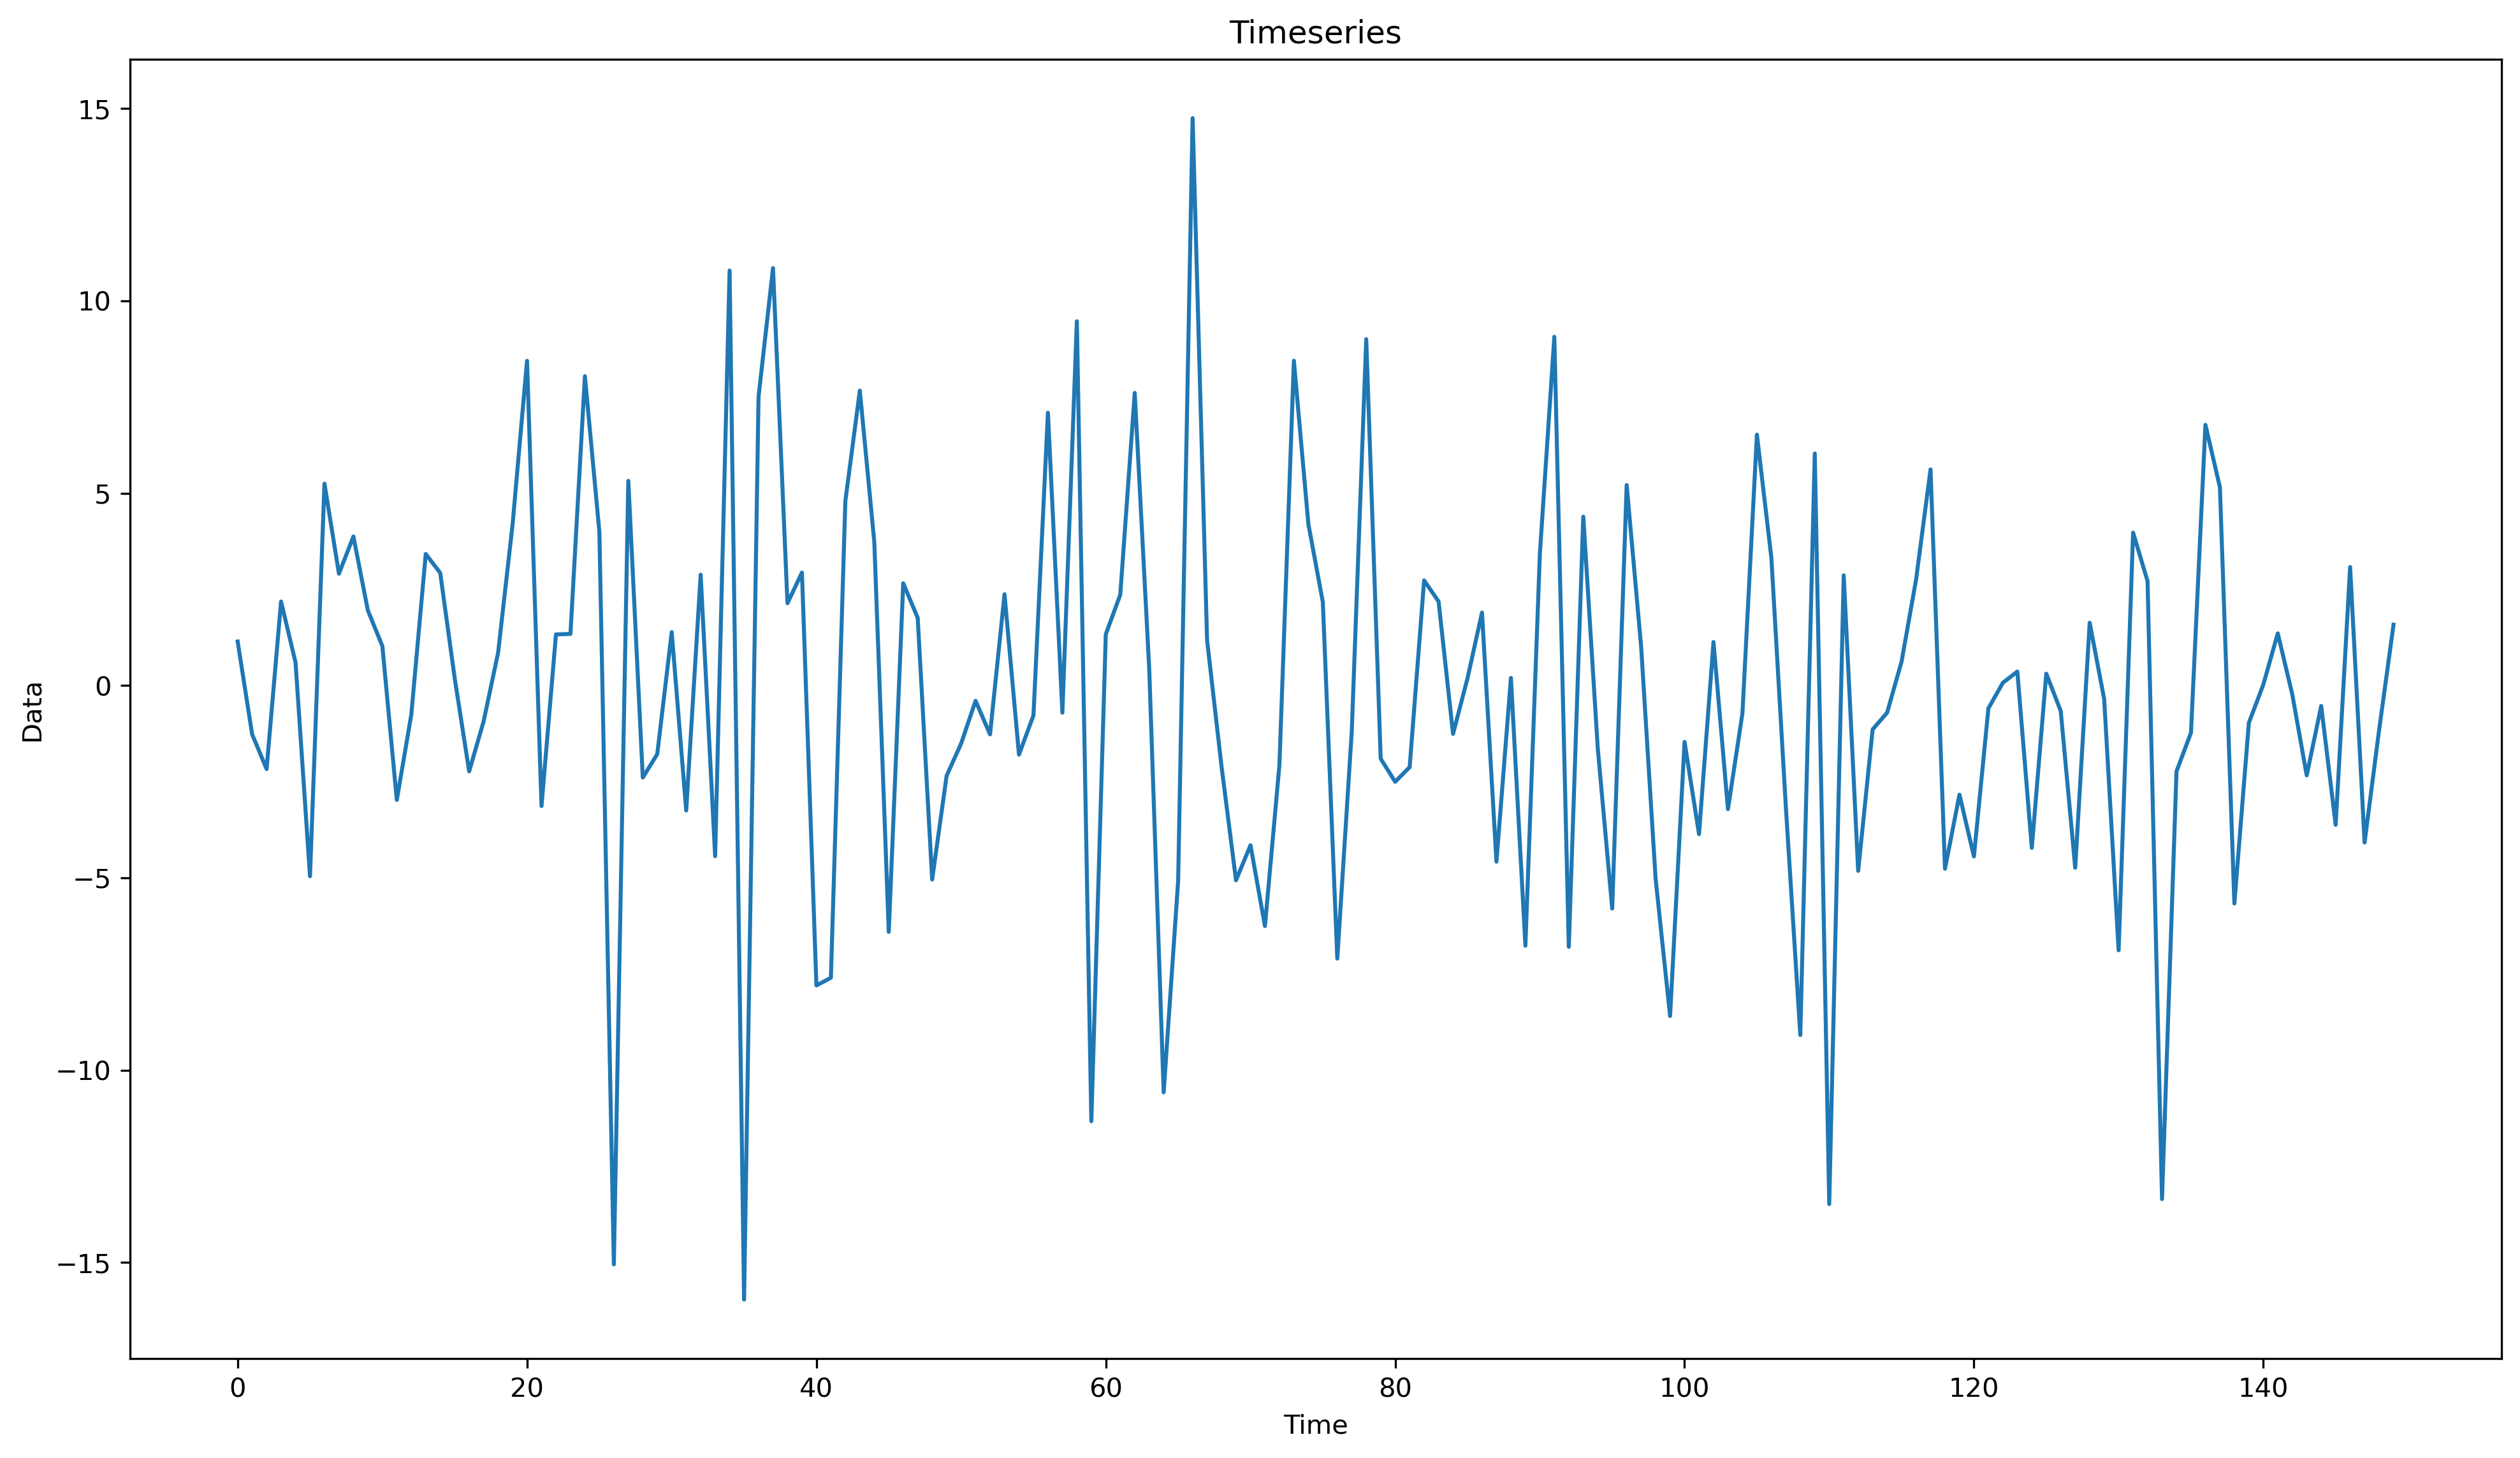

In [7]:
plt.plot(data)
plt.xlabel('Time')
plt.ylabel('Data')
plt.title('Timeseries')
# plt.savefig('data.png')

# MLE using Kalman Filter for ARMA(1, 1)

In [8]:
class KalmanFilterARMA:
    def __init__(self, data):
        self.y = data
        self.N = len(self.y)

    def log_likelihood(self, theta, sigma, phi):
        """Returns the log-likelihood constructed using kalman filter"""

        # Lag 0 autocovariance
        sigma_0 = (sigma ** 2) * (1 + theta ** 2)

        # Lag 1 autocovariance
        sigma_1 = (sigma ** 2) * (- theta)

        # Initial Value for the covariance matrix
        P_a = np.array([[sigma_0, sigma_1], 
                        [sigma_1, sigma_0 - sigma ** 2]])

        # State transition matrix
        A = np.array([[0, 1],
                      [0, phi]])

        # Observation matrix
        C = np.array([[1, 0]])

        # State transition noise covariance
        Q = (sigma ** 2) * np.array([[1, phi - theta], 
                                     [phi - theta, (phi - theta)**2]])

        # Expected values for the initial state
        x_a = np.array([[0],
                        [0]])

        # Initialize Log likelihood
        log_likelihood_value = 0

        for t in range(self.N):

            # Kalman filter time update
            x_b = A.dot(x_a)
            P_b = A.dot(P_a.dot(A.transpose())) + Q

            # Kalman gain
            K = P_b.dot(C.T) / C.dot(P_b.dot(C.T))
            
            # Estimatation
            y_hat = C.dot(x_b)[0]
            
            # Kalman filter measurement update
            x_a = x_b + K * (self.y[t] - y_hat)
            P_a = P_b - K.dot(C.dot(P_b))

            # Increment to log likelihood
            log_likelihood_value -= 0.5 * (log(2 * pi * P_b[0][0]) + ((self.y[t] - y_hat)**2 / P_b[0][0]))

        return log_likelihood_value[0]
    
    def log_likelihood_for_optimization(self, parameters):
        """Returns the negative of log likelihood, making the function convex for minimization."""
        theta, sigma, phi = parameters
        return - self.log_likelihood(theta, sigma, phi)
    
    def optimize(self, initial_guess, verbose=False):
        """Returns the MLE estimators"""
        res = minimize(self.log_likelihood_for_optimization, initial_guess, method='Nelder-Mead')
        result = {
                    'theta': res.x[0], 
                    'sigma': res.x[1], 
                    'phi': res.x[2]
                }
        return res if verbose else result

# $\theta, \sigma, \phi \text{ values from Kalman Filter}$

In [9]:
kf_arma_11 = KalmanFilterARMA(data)

# Solving the optimization problem
result = kf_arma_11.optimize(initial_guess=(0.1, 2, 0.2))     # initial guess = initial (theta, sigma, phi)

pprint(result, width=-1)

{'phi': 0.3801108935892894,
 'sigma': 4.909260165352498,
 'theta': 0.6337141183464083}


In [10]:
kf_loglik = kf_arma_11.log_likelihood(**result)
print(f"Log likelihood using Kalman filter = {kf_loglik}")

Log likelihood using Kalman filter = -451.76513593910977


# From R

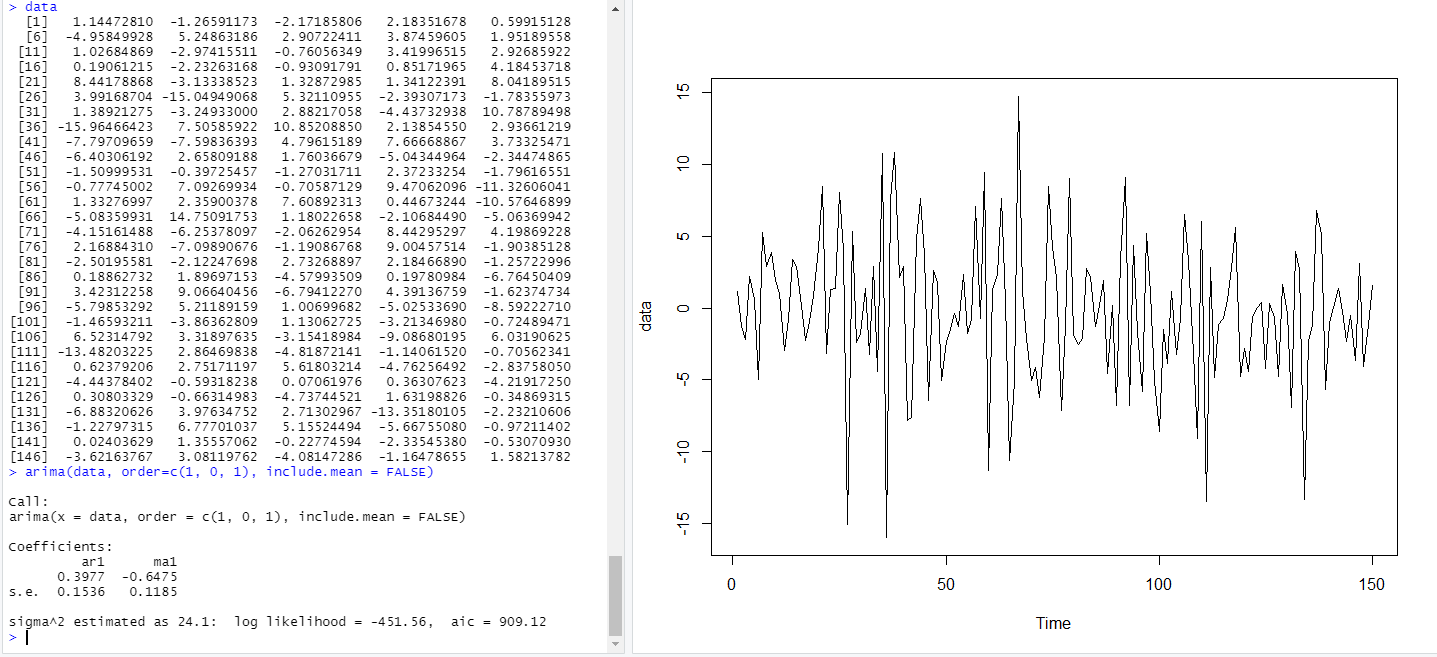

In [11]:
pprint(result | {'Log likelihood': kf_arma_11.log_likelihood(**result)})

{'Log likelihood': -451.76513593910977,
 'phi': 0.3801108935892894,
 'sigma': 4.909260165352498,
 'theta': 0.6337141183464083}


# Comparison with values from R's arima

In [12]:
table = [['', 'θ', 'ϕ', 'σ', 'σ^2', 'Log Likelihood'], 
        ['R arima', -0.6475, 0.3977, '---', 24.1, -451.56], 
        ['Kalman Filter', result['theta'], result['phi'], result['sigma'], result['sigma'] ** 2, kf_arma_11.log_likelihood(**result)]]
print(tabulate(table, tablefmt='grid'))

+---------------+--------------------+--------------------+-------------------+--------------------+---------------------+
|               | θ                  | ϕ                  | σ                 | σ^2                | Log Likelihood      |
+---------------+--------------------+--------------------+-------------------+--------------------+---------------------+
| R arima       | -0.6475            | 0.3977             | ---               | 24.1               | -451.56             |
+---------------+--------------------+--------------------+-------------------+--------------------+---------------------+
| Kalman Filter | 0.6337141183464083 | 0.3801108935892894 | 4.909260165352498 | 24.100835371116833 | -451.76513593910977 |
+---------------+--------------------+--------------------+-------------------+--------------------+---------------------+


#### In R, state space representation contains positive sign for θ. That is why there is a negative sign here before θ. Both the implemented kalman filter and arima from R give the (almost) same log likelihood. So, the implementation of Kalman Filter can be assumed to be working.

#
#


# Problem 1.b

## Modified data

In [13]:
modified_data = []
 
for i, data_i in enumerate(data):
    if i % 9 == 0 and i:
        modified_data.append('Missing')
    modified_data.append(data_i)
# First 20 observations
modified_data[:20]

[1.1447281,
 -1.26591173,
 -2.17185806,
 2.18351678,
 0.59915128,
 -4.95849928,
 5.24863186,
 2.90722411,
 3.87459605,
 'Missing',
 1.95189558,
 1.02684869,
 -2.97415511,
 -0.76056349,
 3.41996515,
 2.92685922,
 0.19061215,
 -2.23263168,
 -0.93091791,
 'Missing']

In [14]:
# At every 10th index a string 'Missing' is added size of the modified data becomes
total_modified_sample = len(modified_data)
print(f"Total modified sample size = {total_modified_sample}\n\n"
      f"Missing values added in the following indexes (index starting from 1):")

missing_value_indexes = [i for i, dat in enumerate(modified_data, 1) if dat == 'Missing']
print(missing_value_indexes)

Total modified sample size = 166

Missing values added in the following indexes (index starting from 1):
[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]


# Modified Data

Text(0.5, 1.0, 'Modified Timeseries')

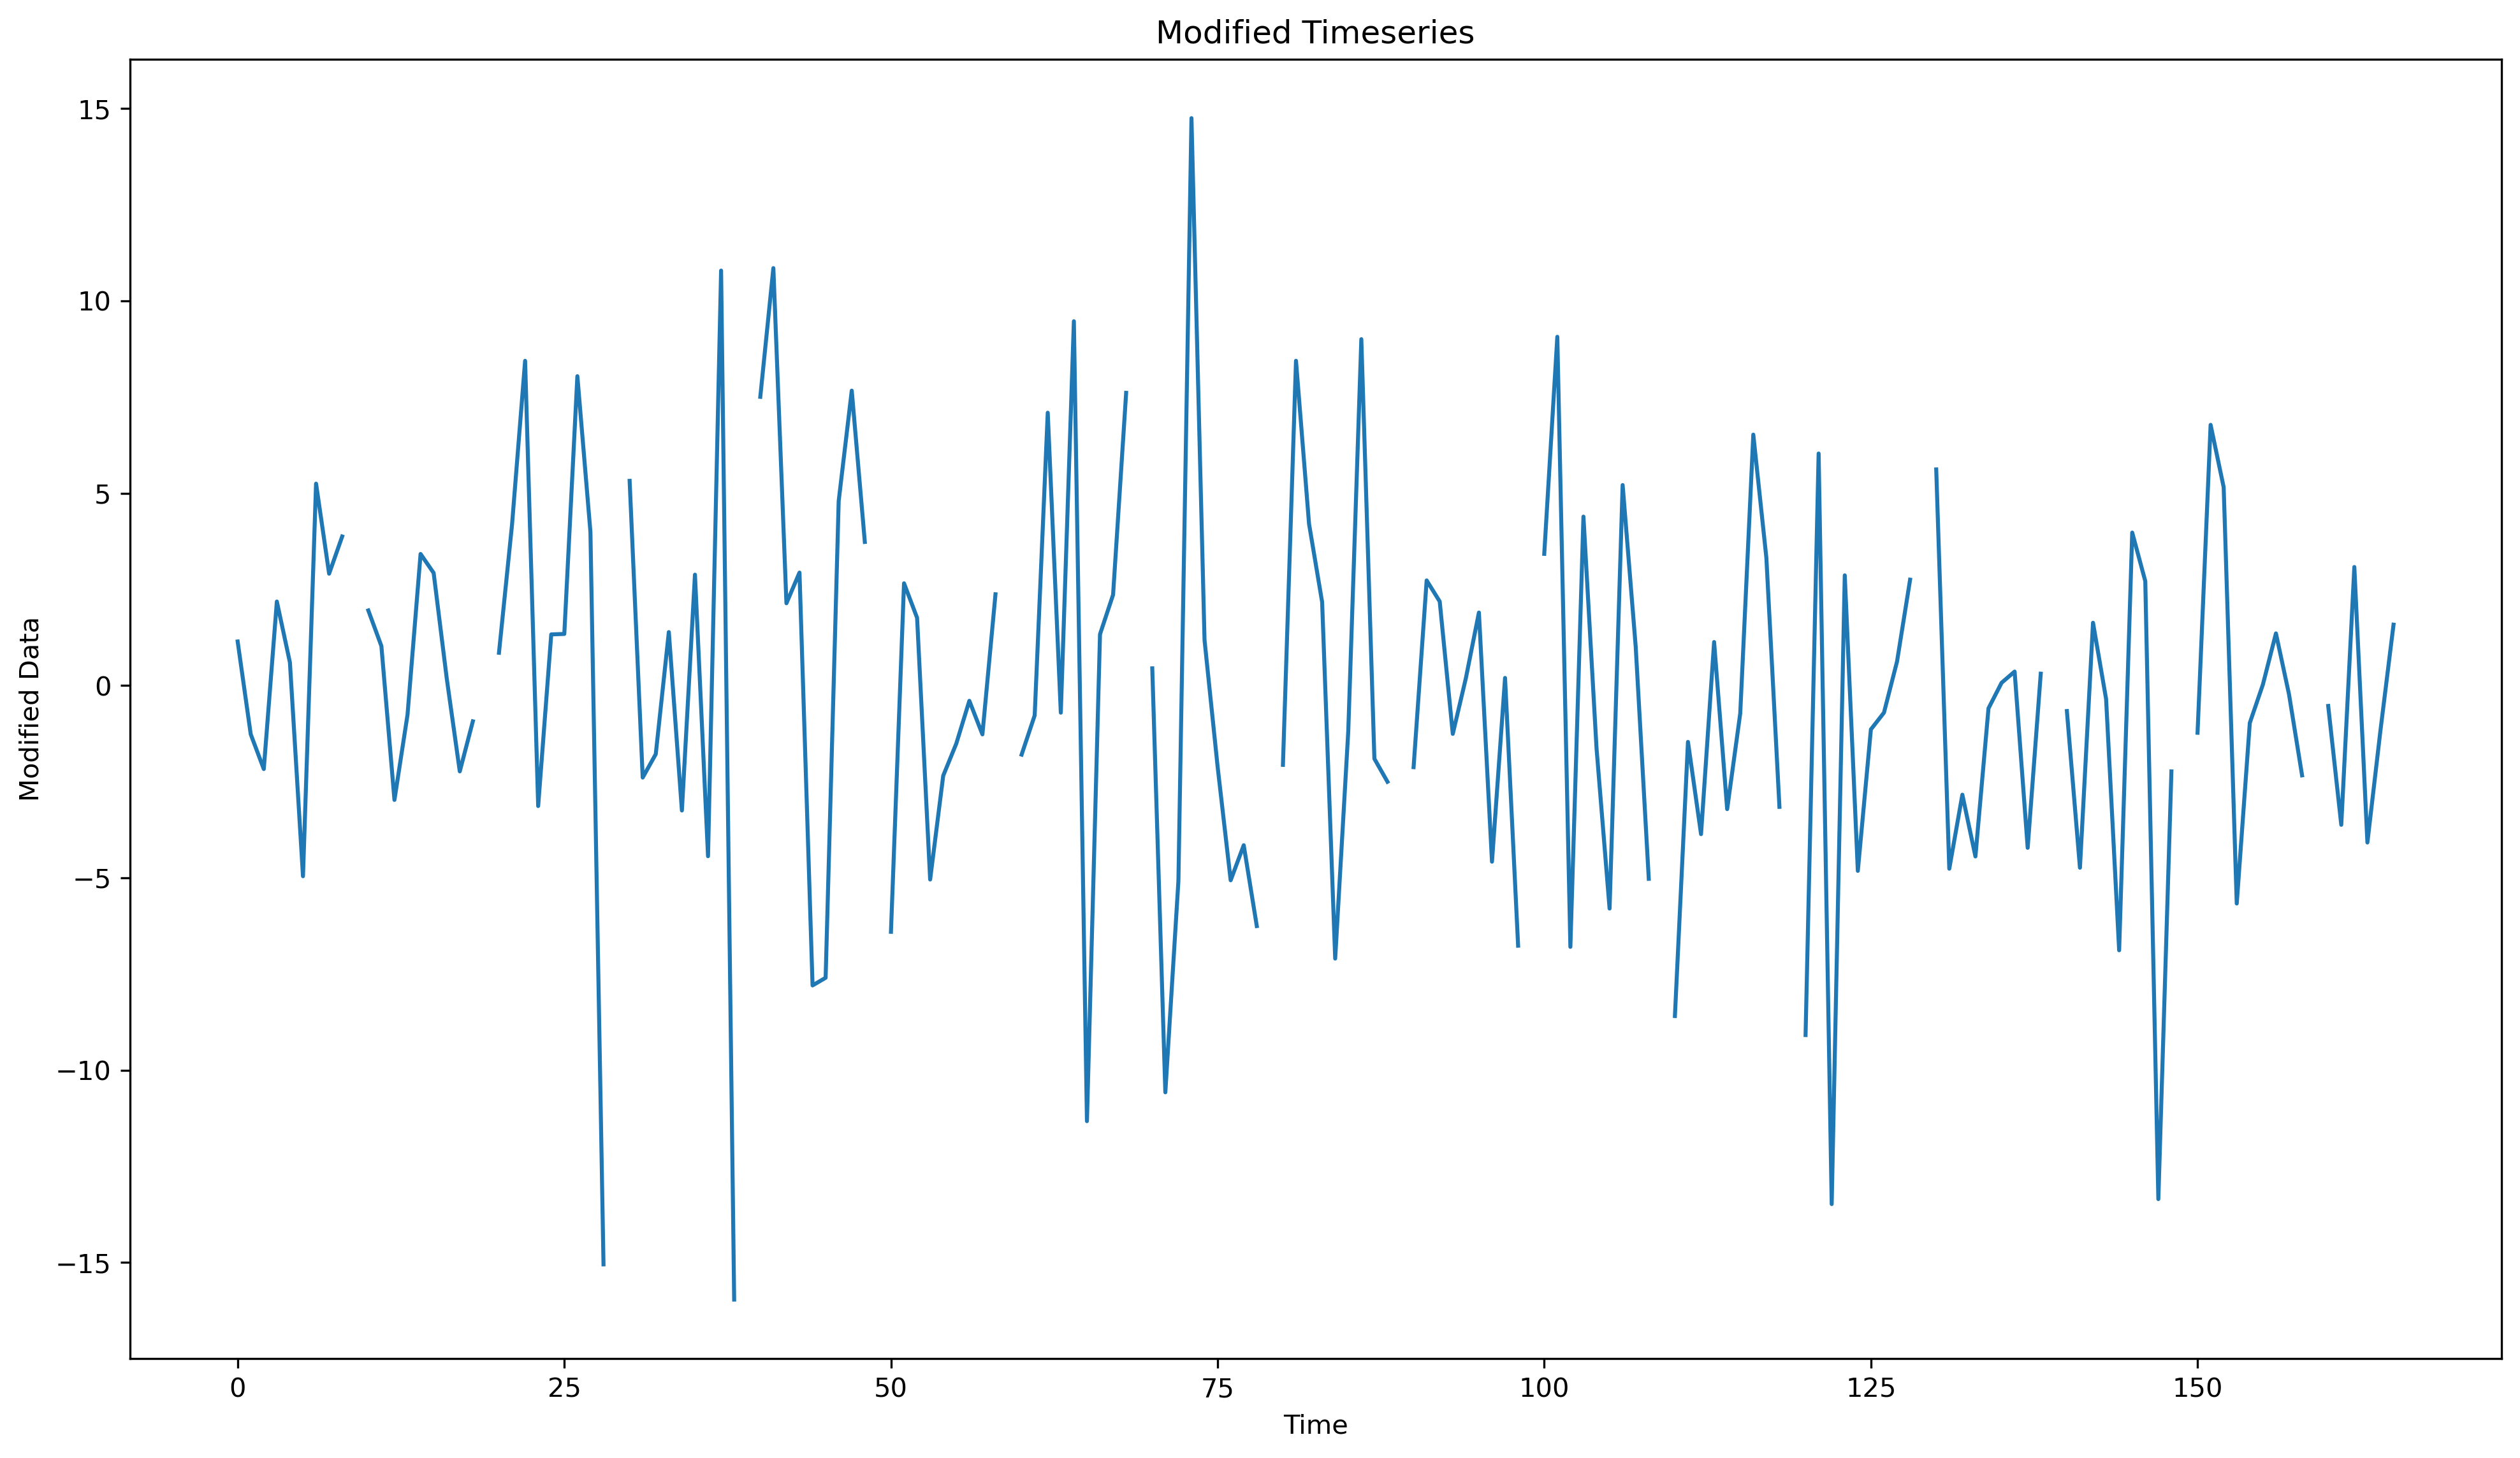

In [15]:
plt.plot([mdat if mdat != 'Missing' else np.nan for mdat in modified_data])
plt.xlabel('Time')
plt.ylabel('Modified Data')
plt.title('Modified Timeseries')
# plt.savefig('mdata.png')

#


# Modified Kalman Filter

In [16]:
class ModifiedKalmanFilterARMA(KalmanFilterARMA):
    """
    Inherits everything from the previous KalmanFilterARMA class.
    
    Only the log_likelihood method of this new class needs to be modified
    to be able to handle missing data.
    """
    
    def log_likelihood(self, theta, sigma, phi):
        """
        Returns the log-likelihood constructed using kalman filter 
        (ability to handle missing data added)
        """

        # Lag 0 autocovariance
        sigma_0 = (sigma ** 2) * (1 + theta ** 2)

        # Lag 1 autocovariance
        sigma_1 = (sigma ** 2) * (- theta)

        # Initial Value for the covariance matrix
        P_a = np.array([[sigma_0, sigma_1], 
                        [sigma_1, sigma_0 - sigma ** 2]])

        # State transition matrix
        A = np.array([[0, 1],
                      [0, phi]])

        # Observation matrix
        C = np.array([[1, 0]])

        # State transition noise covariance
        Q = (sigma ** 2) * np.array([[1, phi - theta], 
                                     [phi - theta, (phi - theta)**2]])

        # Expected values for the initial state
        x_a = np.array([[0],
                        [0]])

        # Initialize Log likelihood
        log_likelihood_value = 0

        for t in range(self.N):

            # Kalman filter time update
            x_b = A.dot(x_a)
            P_b = A.dot(P_a.dot(A.transpose())) + Q

            # Kalman gain
            K = P_b.dot(C.T) / C.dot(P_b.dot(C.T))
            
            # Estimation
            y_hat = C.dot(x_b)[0]
            
            # Handle missing data by setting the measurement equal to the estimation when measurement is unavailable
            if self.y[t] == 'Missing':
                # The recursion encounters a missing value here. The missing value is replaced with the best estimation
                # from the kalman filter. So, when kalman filter measurement is updated state x_a does not change.
                y_t = y_hat
            else:
                y_t = self.y[t]
            
            # Kalman filter measurement update
            # if missing value is encountered 2nd term becomes zero, thus x_a is not updated.
            x_a = x_b + K * (y_t - y_hat)
            
            P_a = P_b - K.dot(C.dot(P_b))

            # Increment to log likelihood
            log_likelihood_value -= 0.5 * (log(2 * pi * P_b[0][0]) + ((y_t - y_hat)**2 / P_b[0][0]))

        return log_likelihood_value[0]

In [17]:
mkf_arma = ModifiedKalmanFilterARMA(data=modified_data)
mkf_results = mkf_arma.optimize(initial_guess=(0.1, 2, 0.2))     # initial guess = initial (theta, sigma, phi)
print(mkf_results)

{'theta': 0.6918614898821323, 'sigma': 4.708263104073579, 'phi': 0.4817442244843543}


In [18]:
mkf_loglik = mkf_arma.log_likelihood(**mkf_results)
print(f"Log likelihood using (modified) Kalman filter = {mkf_loglik}")

Log likelihood using (modified) Kalman filter = -493.05640564435953


In [19]:
table = [['', 'θ', 'ϕ', 'σ', 'σ^2', 'Log Likelihood'], 
        ['Modified Kalman Filter', mkf_results['theta'], mkf_results['phi'], mkf_results['sigma'], 
         mkf_results['sigma'] ** 2, mkf_loglik]]
print(tabulate(table, tablefmt='grid'))

+------------------------+--------------------+--------------------+-------------------+--------------------+---------------------+
|                        | θ                  | ϕ                  | σ                 | σ^2                | Log Likelihood      |
+------------------------+--------------------+--------------------+-------------------+--------------------+---------------------+
| Modified Kalman Filter | 0.6918614898821323 | 0.4817442244843543 | 4.708263104073579 | 22.167741457180572 | -493.05640564435953 |
+------------------------+--------------------+--------------------+-------------------+--------------------+---------------------+
